<a href="https://colab.research.google.com/github/asluchych/introduction-econometrics/blob/main/chapter2_statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: The Simple Linear Regression Model                          
                                                               
# Exercise 3: House Prices

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Read data

In [ ]:
houses = pd.read_csv("houseprices.csv")

Explore data

In [ ]:
houses.describe().round(2)

,PRICE,SQM
count,1080.00,1080.00
mean,154863.18,216.08
std,122912.81,93.65
min,22000.00,61.50
25%,99000.00,149.06
50%,130000.00,203.13
75%,170162.50,260.13
max,1580000.00,733.65


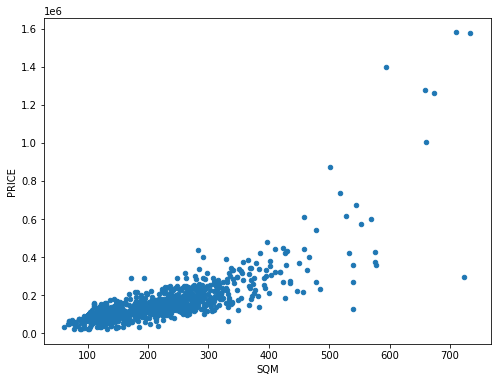

In [ ]:
houses.plot(kind = 'scatter', x = 'SQM', y = 'PRICE', figsize = (8,6))
plt.savefig('plot1.png')
plt.show()

In [ ]:
houses.corr().round(5)

,PRICE,SQM
PRICE,1.00000,0.76069
SQM,0.76069,1.00000


In [ ]:
houses.cov().round(3)

,PRICE,SQM
PRICE,1.510756e+10,8756554.853
SQM,8.756555e+06,8771.174


positive relationship between price and sqm

In [ ]:
dep_var = houses[['PRICE']]
dep_var

,PRICE
0,66500
1,66000
2,68500
3,102000
4,54000
...,...
1075,122570
1076,185000
1077,1280000
1078,123808


In [ ]:
exp_var = houses[['SQM']]
exp_var = sm.add_constant(exp_var)
exp_var

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,SQM
0,1.0,68.84
1,1.0,68.84
2,1.0,73.39
3,1.0,258.55
4,1.0,108.23
...,...,...
1075,1.0,265.05
1076,1.0,427.26
1077,1.0,658.31
1078,1.0,292.46


# a) Linear Regression with OLS

In [ ]:
model = sm.OLS(dep_var, exp_var).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sun, 15 May 2022   Prob (F-statistic):          1.54e-204
Time:                        16:08:49   Log-Likelihood:                -13722.
No. Observations:                1080   AIC:                         2.745e+04
Df Residuals:                    1078   BIC:                         2.746e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.086e+04   6110.189     -9.961      0.000   -7.29e+04   -4.89e+04
SQM          998.3332     25.947     38.476      0.000     947.422    1049.245
==============================================================================
Omnibus:                     1185.144   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139601.187
Skew:                           5.135   Prob(JB):                         0.00
Kurtosis:                      57.743   Cond. No.                         592.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Add a regression line to the scatterplot

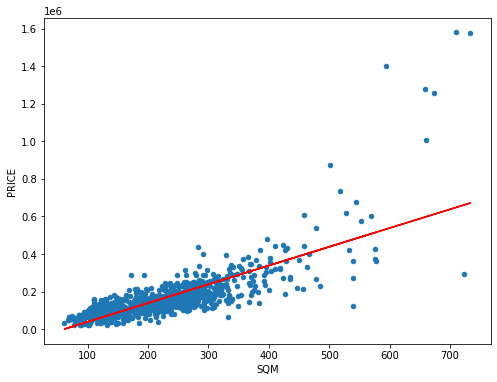

In [ ]:
houses.plot(kind = 'scatter', x = 'SQM', y = 'PRICE', figsize = (8,6))
m, b = np.polyfit(houses['SQM'], houses['PRICE'], 1)
plt.plot(houses['SQM'], m*houses['SQM']+b, color='red')
plt.show()

# c) Predict the price for the house of size 200m^2 

In [ ]:
model.predict([1, 200])

array([138805.0790688])

# d) Scaling

In [ ]:
dep_var2 = houses[['PRICE']]/1000
dep_var2

,PRICE
0,66.500
1,66.000
2,68.500
3,102.000
4,54.000
...,...
1075,122.570
1076,185.000
1077,1280.000
1078,123.808


Linear regression with scaled price

In [ ]:
model_rescaled = sm.OLS(dep_var2, exp_var).fit()
model_rescaled.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sun, 15 May 2022   Prob (F-statistic):          1.54e-204
Time:                        16:50:01   Log-Likelihood:                -6261.6
No. Observations:                1080   AIC:                         1.253e+04
Df Residuals:                    1078   BIC:                         1.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.8616      6.110     -9.961      0.000     -72.851     -48.872
SQM            0.9983      0.026     38.476      0.000       0.947       1.049
==============================================================================
Omnibus:                     1185.144   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139601.187
Skew:                           5.135   Prob(JB):                         0.00
Kurtosis:                      57.743   Cond. No.                         592.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prediction

In [ ]:
model_rescaled.predict([1, 200])

array([138.80507907])

The prediction is still in 1000 USD. For interpretation, calculate in USD * 1000:

In [ ]:
model_rescaled.predict([1, 200]) * 1000

array([138805.0790688])

# Assignment 5: Estimation Uncertainty

Read data

In [133]:
random_data = pd.read_csv("random.csv")

In [ ]:
y1 = random_data[["Y1"]]
x = random_data[["X"]]
x_const = sm.add_constant(x)
 

a) linear model y1 ~ x

In [135]:
model_y1 = sm.OLS(y1, x_const).fit()
model_y1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     306.3
Date:                Fri, 20 May 2022   Prob (F-statistic):           4.64e-42
Time:                        18:06:40   Log-Likelihood:                -701.72
No. Observations:                 200   AIC:                             1407.
Df Residuals:                     198   BIC:                             1414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2438      3.167      1.972      0.050      -0.002      12.489
X              1.8352      0.105     17.500      0.000       1.628       2.042
==============================================================================
Omnibus:                        0.327   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.474
Skew:                           0.061   Prob(JB):                        0.789
Kurtosis:                       2.795   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Covariance matrix of the coefficients

In [136]:
model_y1.cov_params()

,const,X
const,10.030097,-0.326606
X,-0.326606,0.010997


Without a constant/intercept

In [137]:
model_y1_noint = sm.OLS(y1, x).fit()
model_y1_noint.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     Y1   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.132e+04
Date:                Fri, 20 May 2022   Prob (F-statistic):                   2.31e-177
Time:                        18:06:47   Log-Likelihood:                         -703.66
No. Observations:                 200   AIC:                                      1409.
Df Residuals:                     199   BIC:                                      1413.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              2.0385      0.019    106.416      0.000       2.001       2.076
==============================================================================
Omnibus:                        0.321   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.472
Skew:                           0.045   Prob(JB):                        0.790
Kurtosis:                       2.780   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b) Linear model y2 ~ x

In [138]:
y2 = random_data[["Y2"]]

In [139]:
model_y2 = sm.OLS(y2, x_const).fit()
model_y2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1684.
Date:                Fri, 20 May 2022   Prob (F-statistic):           9.08e-99
Time:                        18:06:55   Log-Likelihood:                -549.45
No. Observations:                 200   AIC:                             1103.
Df Residuals:                     198   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0070      1.479      0.681      0.497      -1.910       3.924
X              2.0099      0.049     41.037      0.000       1.913       2.106
==============================================================================
Omnibus:                        1.520   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.171
Skew:                          -0.099   Prob(JB):                        0.557
Kurtosis:                       3.319   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Two scatterplots in one plot

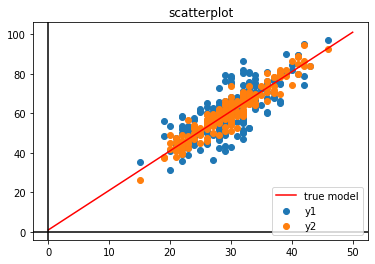

In [140]:
plt.scatter(x, y1, label = "y1")
plt.scatter(x, y2, label = "y2")
x_space = np.linspace(0, 50, 1000)
y = 2*x_space+1
plt.plot(x_space, y, '-r', label = "true model")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("scatterplot")
plt.legend(loc = "lower right")
plt.show()

c) Reduce the variation of x 

(i) by rescaling of X

In [141]:
x_const_rescaled = x_const.copy()
x_const_rescaled[['X']] = x_const_rescaled[['X']]/10

In [142]:
model_y2_rescaled = sm.OLS(y2, x_const_rescaled).fit()
model_y2_rescaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1684.
Date:                Fri, 20 May 2022   Prob (F-statistic):           9.08e-99
Time:                        18:07:04   Log-Likelihood:                -549.45
No. Observations:                 200   AIC:                             1103.
Df Residuals:                     198   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0070      1.479      0.681      0.497      -1.910       3.924
X             20.0986      0.490     41.037      0.000      19.133      21.064
==============================================================================
Omnibus:                        1.520   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.171
Skew:                          -0.099   Prob(JB):                        0.557
Kurtosis:                       3.319   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(ii) by reducing the sample size; use the first 100 observations

In [143]:
model_y2_smallSS = sm.OLS(y2.iloc[0:100], x_const.iloc[0:100, ]).fit()
model_y2_smallSS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     951.9
Date:                Fri, 20 May 2022   Prob (F-statistic):           2.88e-52
Time:                        18:07:08   Log-Likelihood:                -266.81
No. Observations:                 100   AIC:                             537.6
Df Residuals:                      98   BIC:                             542.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0258      1.945      1.041      0.300      -1.835       5.886
X              1.9969      0.065     30.853      0.000       1.868       2.125
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.678
Skew:                          -0.124   Prob(JB):                        0.713
Kurtosis:                       2.683   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d) inverse regression

1) for regression in a)

In [ ]:
y1_const = sm.add_constant(y1) 

In [148]:
model_y1_inv = sm.OLS(x, y1_const).fit()
model_y1_inv.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     306.3
Date:                Fri, 20 May 2022   Prob (F-statistic):           4.64e-42
Time:                        21:02:16   Log-Likelihood:                -530.42
No. Observations:                 200   AIC:                             1065.
Df Residuals:                     198   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5954      1.174      8.170      0.000       7.279      11.911
Y1             0.3309      0.019     17.500      0.000       0.294       0.368
==============================================================================
Omnibus:                        3.169   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                2.188
Skew:                          -0.038   Prob(JB):                        0.335
Kurtosis:                       2.493   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(2) for regression in b)

In [ ]:
y2_const = sm.add_constant(y2) 

In [153]:
model_y2_inv = sm.OLS(x, y2_const).fit()
model_y2_inv.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1684.
Date:                Fri, 20 May 2022   Prob (F-statistic):           9.08e-99
Time:                        21:05:24   Log-Likelihood:                -398.72
No. Observations:                 200   AIC:                             801.4
Df Residuals:                     198   BIC:                             808.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6762      0.671      3.991      0.000       1.354       3.998
Y2             0.4452      0.011     41.037      0.000       0.424       0.467
==============================================================================
Omnibus:                        1.963   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.588
Skew:                           0.152   Prob(JB):                        0.452
Kurtosis:                       3.313   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""